## For DAT410- AI System Design - Assignment 4 - Diagnostic System

In [11]:
import pandas as pd

# suffixes 0 1 2 represent the mean, standard error and worst value over a set of samples
data_file = './wdbc.pkl'
df = pd.read_pickle(data_file)
print(df.head(5))
print(df.T[0])

         id  malignant  radius_0  texture_0  perimeter_0  area_0  \
0    842302          1     17.99      10.38       122.80  1001.0   
1    842517          1     20.57      17.77       132.90  1326.0   
2  84300903          1     19.69      21.25       130.00  1203.0   
3  84348301          1     11.42      20.38        77.58   386.1   
4  84358402          1     20.29      14.34       135.10  1297.0   

   smoothness_0  compactness_0  concavity_0  concave points_0  ...  radius_2  \
0       0.11840        0.27760       0.3001           0.14710  ...     25.38   
1       0.08474        0.07864       0.0869           0.07017  ...     24.99   
2       0.10960        0.15990       0.1974           0.12790  ...     23.57   
3       0.14250        0.28390       0.2414           0.10520  ...     14.91   
4       0.10030        0.13280       0.1980           0.10430  ...     22.54   

   texture_2  perimeter_2  area_2  smoothness_2  compactness_2  concavity_2  \
0      17.33       184.60  2019

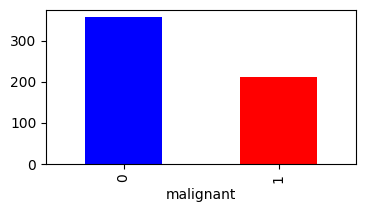

In [12]:
# plot the distribution of the malignant and benign samples, using plot only
import matplotlib.pyplot as plt
df['malignant'].value_counts().plot(kind='bar', color=['blue', 'red'], figsize=(4, 2))
plt.show()


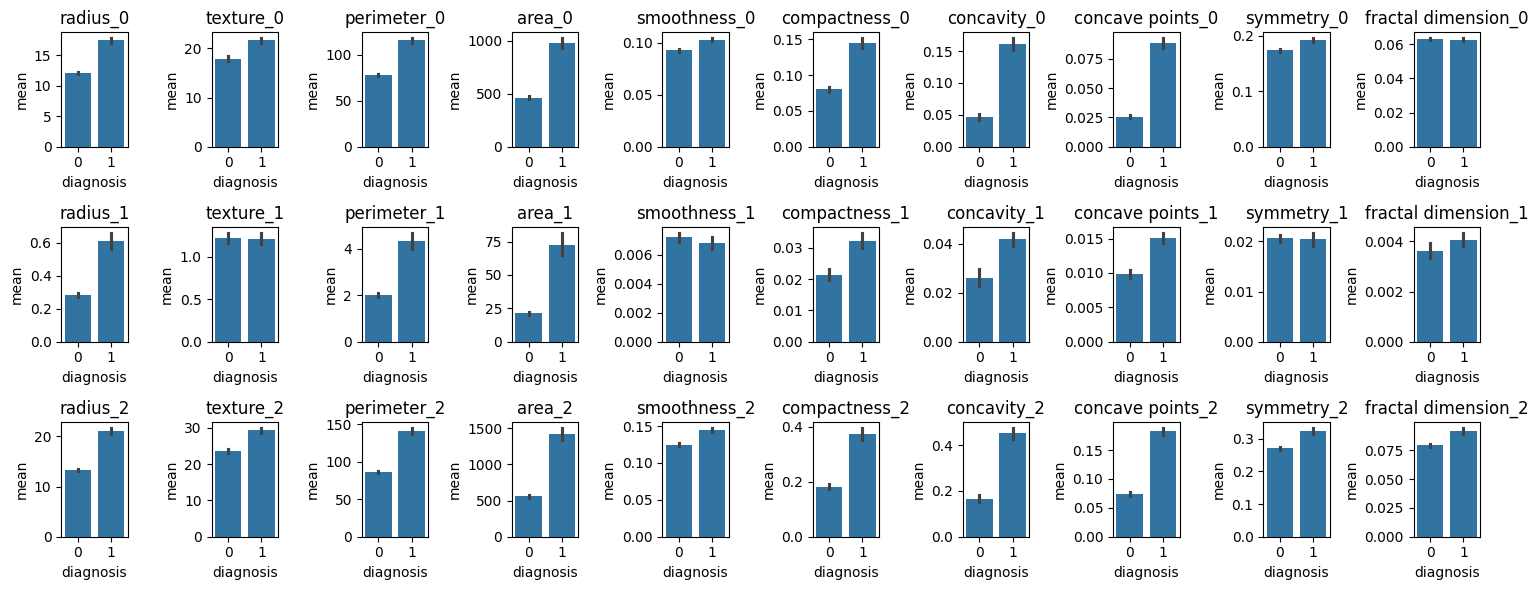

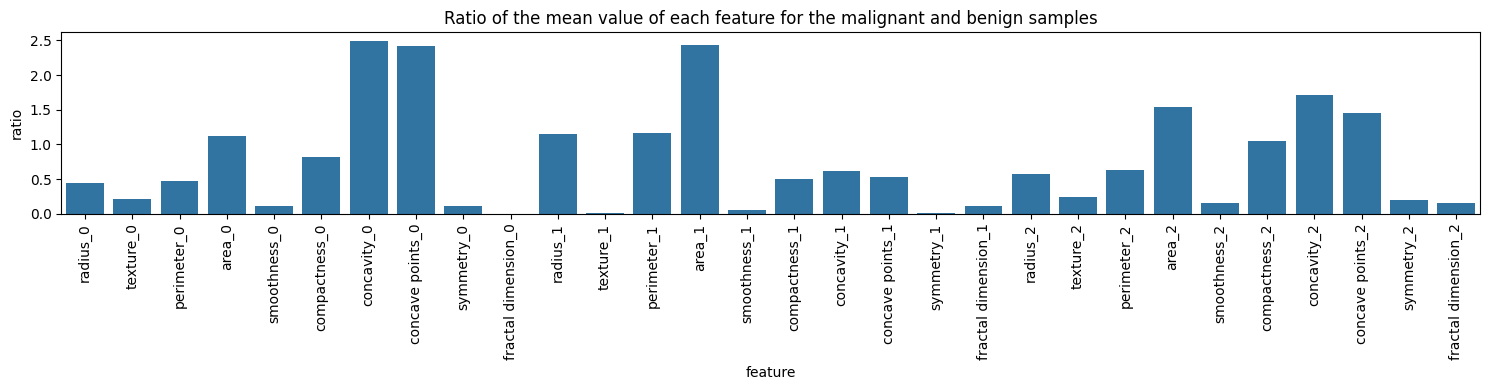

In [13]:

# calculate the mean value of each feature for the malignant and benign samples
features = df.columns[2:]
malignant_mean = df[df['malignant'] == 1][features].mean()
benign_mean = df[df['malignant'] == 0][features].mean()

# plot the mean with bar chart, one subplot for one feature
import seaborn as sns
fig, axes = plt.subplots(3, 10, figsize=(15, 6))
for i, feature in enumerate(features):
    ax = axes[int(i / 10), i % 10]
    sns.barplot(x='malignant', y=feature, data=df, ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('mean')
    ax.set_xlabel('diagnosis')
plt.tight_layout()
plt.show()

ratio = abs(malignant_mean - benign_mean) / benign_mean
# plot the ratio of the mean value of each feature for the malignant and benign samples
fig, ax = plt.subplots(figsize=(15, 4))
sns.barplot(x=ratio.index, y=ratio.values, ax=ax)
ax.set_title('Ratio of the mean value of each feature for the malignant and benign samples')
ax.set_ylabel('ratio')
ax.set_xlabel('feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


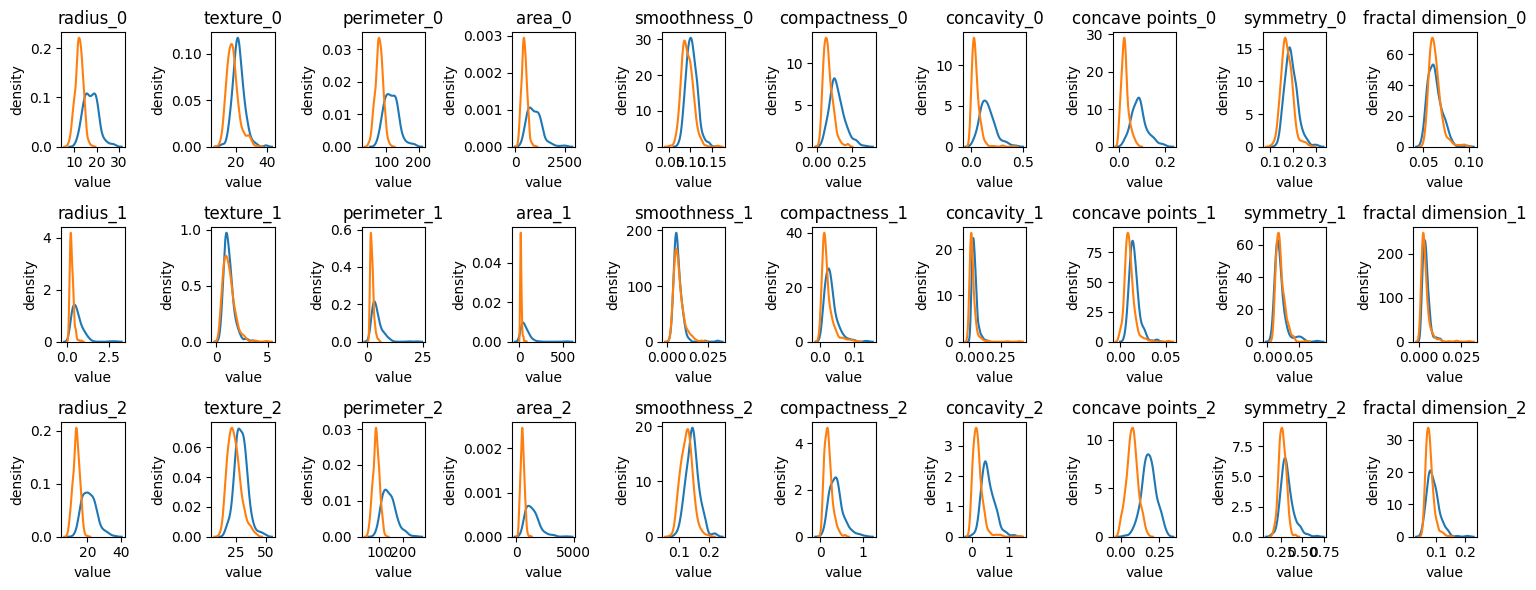

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns[2:]
# plot gaussian distribution of each feature for the malignant and benign samples
fig, axes = plt.subplots(3, 10, figsize=(15, 6))
for i, feature in enumerate(features):
    ax = axes[int(i / 10), i % 10]
    sns.kdeplot(df[df['malignant'] == 1][feature], label='malignant', ax=ax)
    sns.kdeplot(df[df['malignant'] == 0][feature], label='benign', ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('density')
    ax.set_xlabel('value')
plt.tight_layout()
plt.show()


Accuracy: 0.6309314586994728
Precision: 0.5023923444976076
Recall: 0.9905660377358491
F1-score: 0.6666666666666666


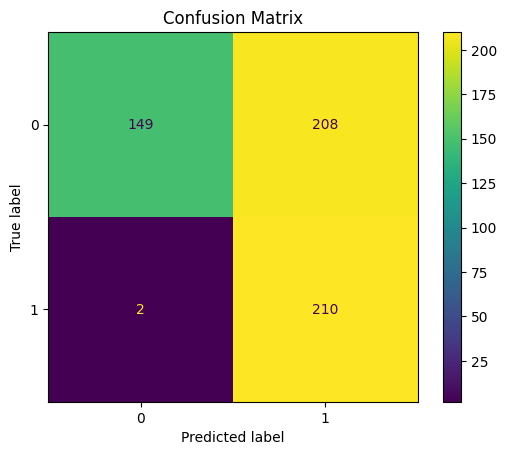

In [17]:
#### Rule-based model ####
# cell size -> area_mean, area_se, area_worst
# cell shape -> concavity_mean, concavity_se, concavity_worst
# cell texture ->  texture_mean, texture_se, texture_worst
# cell homogeneity -> smoothness_mean, smoothness_se, smoothness_worst

cell_size_str="area"
cell_shape_str="concave points"
cell_texture_str="texture"
cell_homogeneity_str="smoothness"


def is_cell_size_is_abnormal(row, stats):
  mean_abnormal = row[cell_size_str+"_0"] > stats.loc['75%', cell_size_str+"_0"]
  std_abnormal = row[cell_size_str+"_1"] > stats.loc['75%', cell_size_str+"_1"]
  worst_val_abnormal = row[cell_size_str+"_2"] > stats.loc['75%', cell_size_str+"_2"]
  is_abnormal = mean_abnormal | std_abnormal | worst_val_abnormal
  return is_abnormal

def cell_shape_is_abnormal(row, stats):
  mean_abnormal = row[cell_shape_str+"_0"] > stats.loc['75%', cell_shape_str+"_0"]
  std_abnormal = row[cell_shape_str+"_1"] > stats.loc['75%', cell_shape_str+"_1"]
  worst_val_abnormal = row[cell_shape_str+"_2"] > stats.loc['75%', cell_shape_str+"_2"]
  is_abnormal = mean_abnormal | std_abnormal | worst_val_abnormal
  return is_abnormal

def cell_texture_is_abnormal(row, stats):
  mean_abnormal = row[cell_texture_str+"_0"] > stats.loc['75%', cell_texture_str+"_0"]
  std_abnormal = row[cell_texture_str+"_1"] > stats.loc['75%', cell_texture_str+"_1"]
  worst_val_abnormal = row[cell_texture_str+"_2"] > stats.loc['75%', cell_texture_str+"_2"]
  is_abnormal = mean_abnormal | std_abnormal | worst_val_abnormal
  return is_abnormal

def cell_homogeneity_is_abnormal(row, stats):
  mean_abnormal = row[cell_homogeneity_str+"_0"] > stats.loc['75%', cell_homogeneity_str+"_0"]
  std_abnormal = row[cell_homogeneity_str+"_1"] > stats.loc['75%', cell_homogeneity_str+"_1"]
  worst_val_abnormal = row[cell_homogeneity_str+"_2"] > stats.loc['75%', cell_homogeneity_str+"_2"]
  is_abnormal = mean_abnormal | std_abnormal | worst_val_abnormal
  return is_abnormal

def is_malignant(row, stats):
  if is_cell_size_is_abnormal(row, stats) \
  or cell_shape_is_abnormal(row, stats) \
  or cell_texture_is_abnormal(row, stats) \
  or cell_homogeneity_is_abnormal(row, stats):
    return 1
  return 0


stats = df.describe()
prediction = df.apply(is_malignant, axis=1, args=(stats,))
df['Prediction'] = prediction

df[["malignant","Prediction"]]

df['Prediction'] = prediction
df[["malignant","Prediction"]]

# plot the accuracy, precision, recall, F1-score and confusion matrix of the rule-based model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def print_metrics(actual, predictions):
  accuracy = accuracy_score(actual, predictions)
  precision = precision_score(actual, predictions)
  recall = recall_score(actual, predictions)
  f1 = f1_score(actual, predictions)

  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)

  cm = confusion_matrix(actual, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.title('Confusion Matrix')
  plt.show()

actual = df["malignant"]
predictions = df["Prediction"]

print_metrics(actual, predictions)

**A random forest classifier** using the sklearn framework applied to the features given in the supplied dataset.  

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-score: 0.9523809523809524


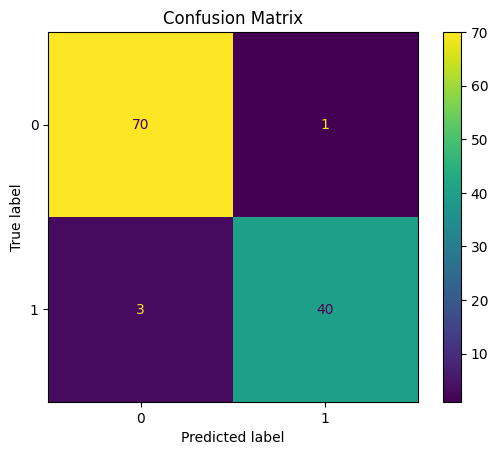

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df_rf = pd.read_pickle(data_file)

X = df_rf.drop(columns=['malignant'])
y = df_rf['malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print_metrics(y_test, y_pred)


Multi-Layer Perceptron (MLP) classifier

Number of training samples: 454
Number of training malignant samples: 169
Number of training benign samples: 285
Number of test samples: 115
Number of test malignant samples: 43
Number of test benign samples: 72
Accuracy on test set:
Accuracy: 0.9826086956521739
Precision: 1.0
Recall: 0.9534883720930233
F1-score: 0.9761904761904763


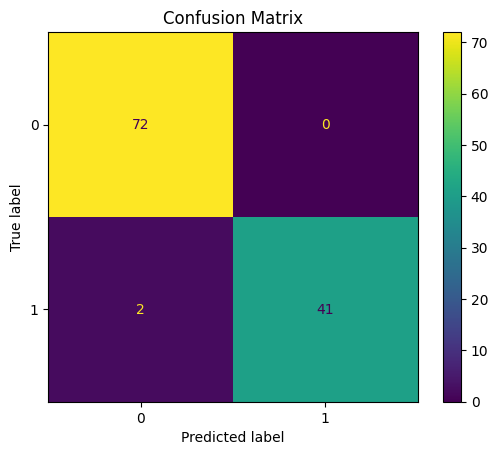

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df_mlp = pd.read_pickle(data_file)
# split the dataset into malignant and benign samples
malignant_samples = df_mlp[df_mlp['malignant'] == 1]
benign_samples = df_mlp[df_mlp['malignant'] == 0]

X_malignant = malignant_samples.drop(columns=['malignant'])
y_malignant = malignant_samples['malignant']

X_benign = benign_samples.drop(columns=['malignant'])
y_benign = benign_samples['malignant']

# extract 80% of the malignant samples and 80% of the benign samples as the training set
X_train_malignant, X_test_malignant, y_train_malignant, y_test_malignant = train_test_split(X_malignant, y_malignant, test_size=0.2, random_state=42)
X_train_benign, X_test_benign, y_train_benign, y_test_benign = train_test_split(X_benign, y_benign, test_size=0.2, random_state=42)
print("Number of training samples:", len(X_train_malignant) + len(X_train_benign))
print("Number of training malignant samples:", len(X_train_malignant))
print("Number of training benign samples:", len(X_train_benign))
print("Number of test samples:", len(X_test_malignant) + len(X_test_benign))
print("Number of test malignant samples:", len(X_test_malignant))
print("Number of test benign samples:", len(X_test_benign))

# combine the training set of the malignant and benign samples
X_train = pd.concat([X_train_malignant, X_train_benign])
y_train = pd.concat([y_train_malignant, y_train_benign])

# combine the test set of the malignant and benign samples
X_test = pd.concat([X_test_malignant, X_test_benign])
y_test = pd.concat([y_test_malignant, y_test_benign])

# normalize the training and test set
# !!! very important!, casuing degree explosion if not normalized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64,32,16), 
      max_iter=10000,  activation='relu', solver='adam', random_state=42)
mlp_classifier.fit(X_train, y_train)

y_pred = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:")
print_metrics(y_test, y_pred)
